# Task 1: Load and Explore the Dataset

In [1]:
import pandas as pd
import seaborn as sns

# Load the Iris dataset from Seaborn (it is available as a sample dataset)
df = sns.load_dataset('iris')

# Display the first few rows
print(df.head())

# Check the data types and any missing values
print(df.info())

# Check for missing values
print(df.isnull().sum())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# Clean the dataset:

In [3]:
# Fill missing values with the median (if any) for numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [4]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)


# Task 2: Basic Data Analysis

In [5]:
# Compute basic statistics
print(df.describe())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


count: The number of non-null values in each column. Here, each column has 150 data points, which is typical for the Iris dataset, indicating there are no missing values.

mean: The average value for each column. This is calculated by summing all the values in the column and dividing by the count of the values. For example:

The average sepal_length is 5.843.

The average sepal_width is 3.057.

The average petal_length is 3.758.

The average petal_width is 1.199.

std (Standard Deviation): This measures the spread or dispersion of the values. A higher standard deviation means that the data points are more spread out from the mean.

The sepal_length has a standard deviation of 0.828, indicating moderate variability around the mean.

Petal_length has a higher standard deviation of 1.765, showing greater variability.

min: The minimum value in each column.

The smallest sepal_length is 4.3.

The smallest sepal_width is 2.0.

The smallest petal_length is 1.0.

The smallest petal_width is 0.1.

25% (1st Quartile): This is the value at the 25th percentile (the value below which 25% of the data fall).

The 25th percentile for sepal_length is 5.1, meaning 25% of the data points have a sepal length less than or equal to 5.1.

50% (Median / 2nd Quartile): This is the value at the 50th percentile (the median), where half of the data points are below this value, and half are above it.

The median sepal_length is 5.8.

75% (3rd Quartile): This is the value at the 75th percentile, below which 75% of the data points fall.

The 75th percentile for sepal_length is 6.4, meaning 75% of the data points have a sepal length less than or equal to 6.4.

max: The maximum value in each column.

The largest sepal_length is 7.9.

Key Insights from the Data:
Sepal Length: The sepal length seems to have a moderate variation (std = 0.83), with values ranging from 4.3 to 7.9.

Sepal Width: The sepal width ranges from 2.0 to 4.4, with a standard deviation of 0.44, indicating a relatively small spread.

Petal Length: The petal length has a broader range (1.0 to 6.9) and greater variability (std = 1.77), suggesting a more significant difference between the flowers.

Petal Width: The petal width ranges from 0.1 to 2.5, with moderate variation, suggesting that petal width plays a significant role in distinguishing species.

In [6]:
# Group by 'species' and compute the mean of numerical columns
grouped_df = df.groupby('species').mean()
print(grouped_df)


            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


# Task 3: Data Visualization

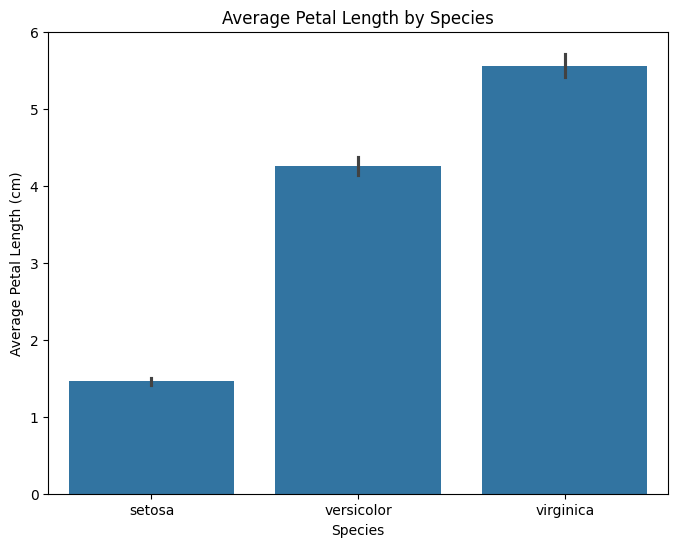

In [7]:
import matplotlib.pyplot as plt

# Bar chart of average petal length per species
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='petal_length', data=df)
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.show()


Key Observations:
The y-axis represents average petal length in centimeters, ranging from 0 to 6 cm.

The x-axis represents the three flower species.

The average petal lengths are:

Setosa: ~1.5 cm

Versicolor: ~4.5 cm

Virginica: ~5.5 cm

Each bar includes error bars, indicating variability or standard error in the measurements.

Interpretation:
Setosa has the smallest petal length, significantly different from the other species.

Versicolor is in the middle range, showing a moderate increase in petal length.

Virginica exhibits the largest petal length

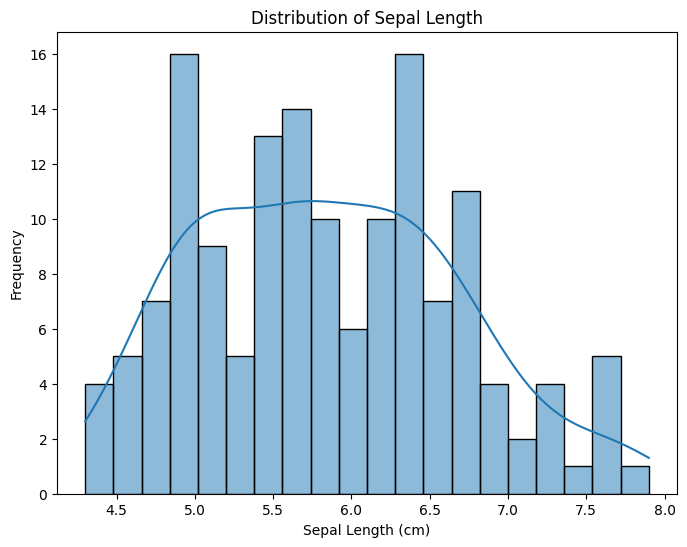

In [8]:
# Histogram of sepal length
plt.figure(figsize=(8, 6))
sns.histplot(df['sepal_length'], kde=True, bins=20)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


The x-axis represents sepal length, ranging from 4.5 cm to 8.0 cm.

The y-axis represents frequency, showing how often each sepal length occurs.

The distribution appears to be bimodal, meaning it has two peaks:

One peak at around 5.0 cm (frequency ≈ 16)

Another peak at around 6.5 cm (frequency ≈ 16)

The lowest frequencies occur at the extremes: 4.5 cm and 8.0 cm, indicating fewer occurrences of very short or very long sepals.

A smooth density curve overlays the histogram, providing a clearer visualization of the underlying distribution pattern.

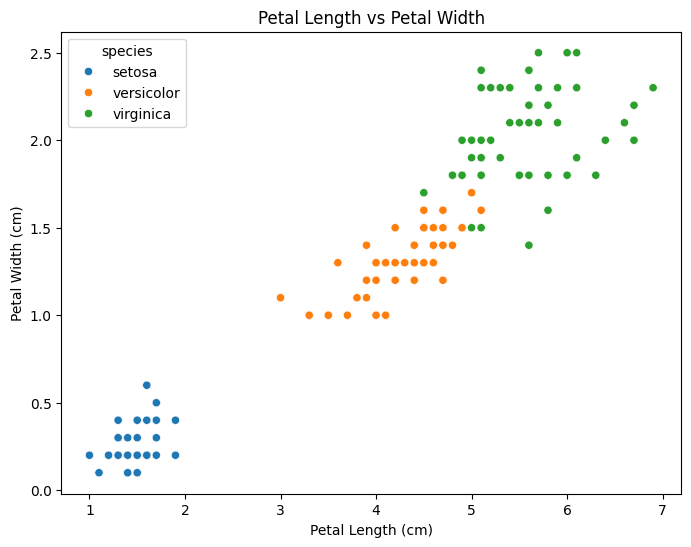

In [9]:
# Scatter plot of petal length vs. petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


Setosa flowers have small petal lengths and widths, clustering in the lower-left corner.

Versicolor flowers lie in the middle range, showing intermediate petal sizes.

Virginica flowers display large petals, positioned toward the upper-right.

# Error Handling

In [11]:
import seaborn as sns

# Try to load the Iris dataset
try:
    df = sns.load_dataset('iris')
    # If successful, print the first few rows to confirm
    print(df.head())
except ValueError as e:
    print(f"Error loading dataset: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
